# Árbol de Regresión

## Librerias a usar

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Selección de datos
Utilizamos la separación realizada para el mejor modelo de regresión lineal, también se incluyen variables categóricas consideradas en el análisis exploratorio.

In [258]:
train_data=pd.read_csv("train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath"]
_train2 = train_data[columnas_aUsar]

y = train_data["SalePrice"]
X = _train2

print("Columnas usadas (" + str(len(_train2.columns)) + ") :\n"+ str(_train2.columns))

Columnas usadas (9) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath'],
      dtype='object')


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 9)
(438, 9)
(1021,)
(438,)


In [260]:
# Escalar datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelo 1

In [261]:
# Entrenar modelo
modelo = DecisionTreeRegressor(max_depth=5)
modelo.fit(X_train_scaled, y_train)

# Predicciones
modelo1_pred = modelo.predict(X_test_scaled)

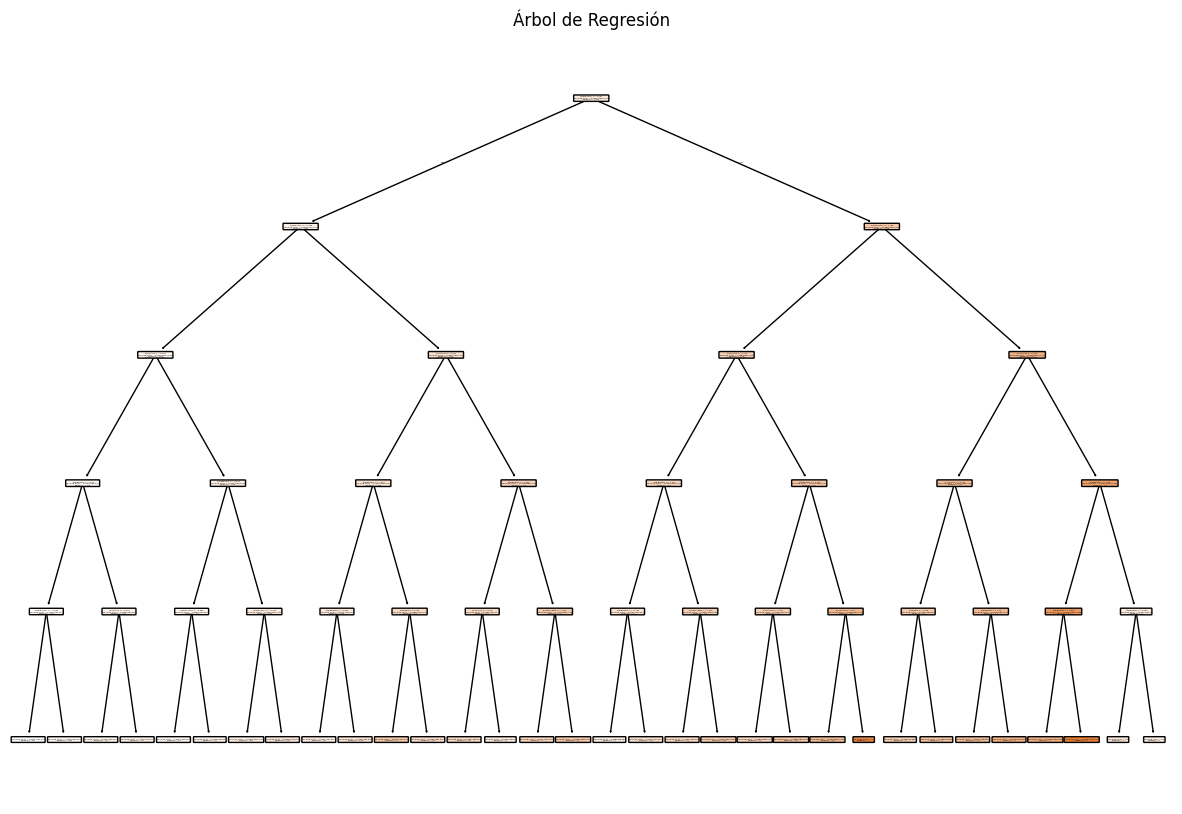

In [262]:
# Graficar el árbol
plt.figure(figsize=(15, 10))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Regresión")
plt.show()

#### Evaluación

In [263]:
r2 = r2_score(y_test, modelo1_pred)
print(f"R^2: {r2:.4f}")

mae = mean_absolute_error(y_test, modelo1_pred)
print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test, modelo1_pred)
print(f"MSE: {mse:.4f}")

R^2: 0.8067
MAE: 25841.9049
MSE: 1328225228.5576


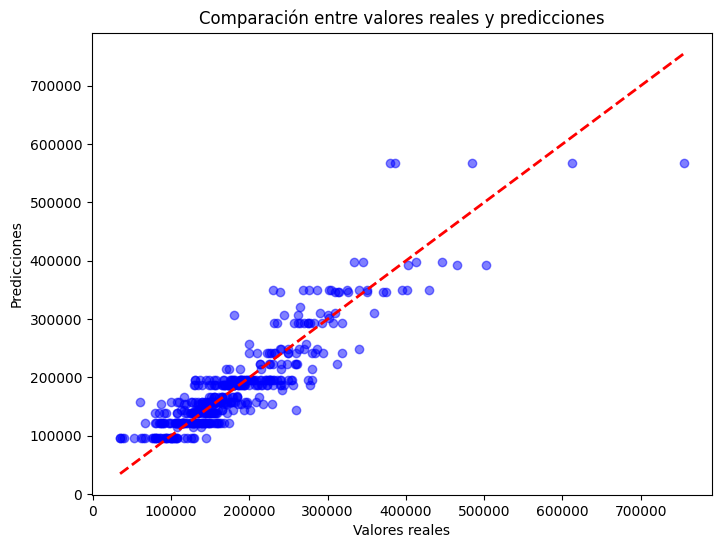

In [264]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, modelo1_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

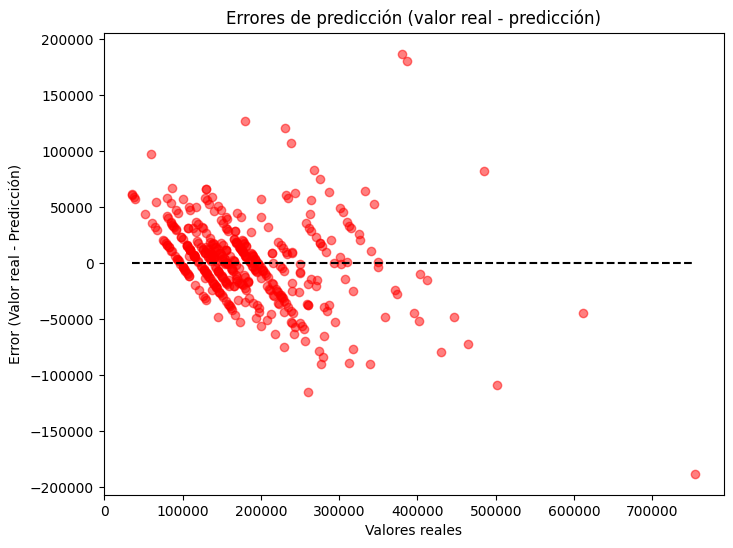

In [265]:
errores = modelo1_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

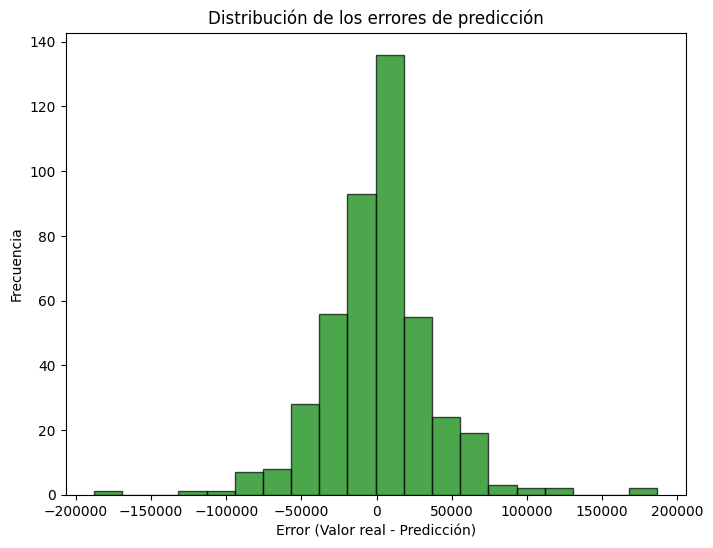

In [266]:
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

## Modelo 2

In [267]:
# Entrenar modelo
modelo = DecisionTreeRegressor(max_depth=6)
modelo.fit(X_train_scaled, y_train)

# Predicciones
modelo1_pred = modelo.predict(X_test_scaled)

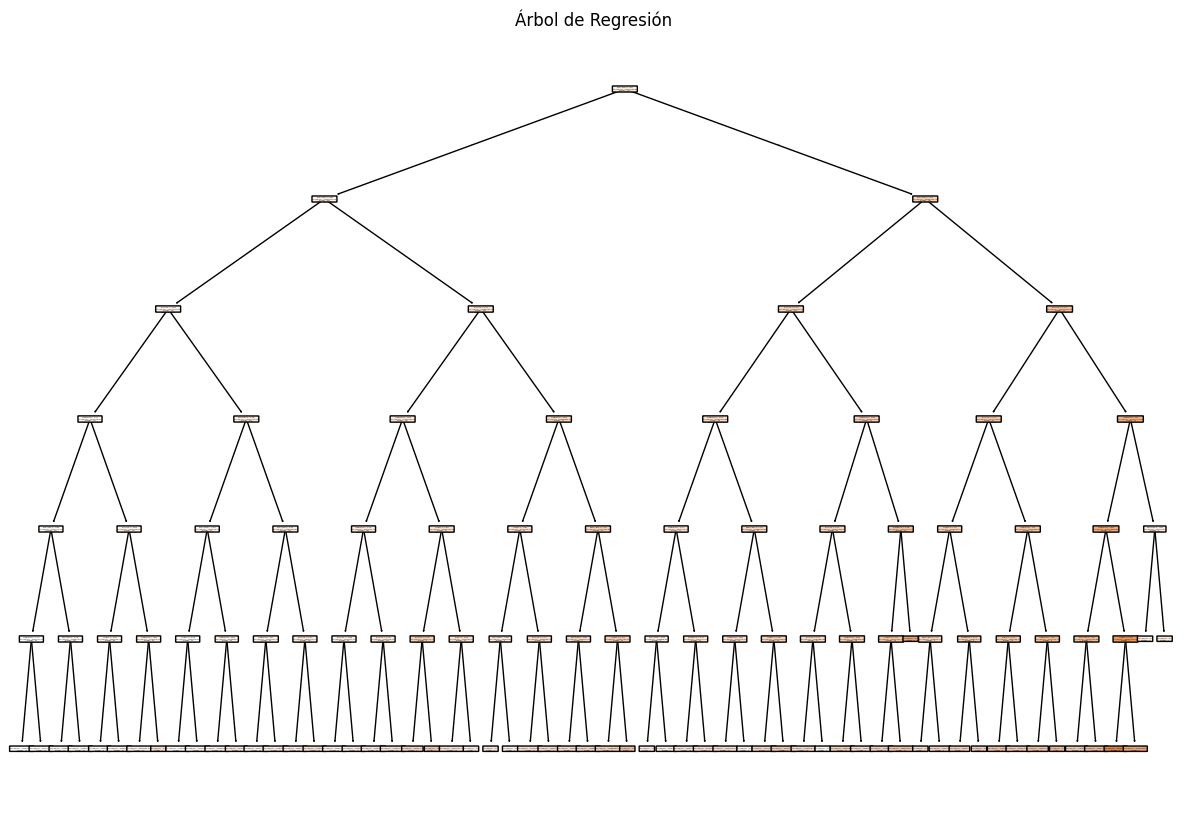

In [268]:
# Graficar el árbol
plt.figure(figsize=(15, 10))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Regresión")
plt.show()

#### Evaluación

In [269]:
r2 = r2_score(y_test, modelo1_pred)
print(f"R^2: {r2:.4f}")

mae = mean_absolute_error(y_test, modelo1_pred)
print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test, modelo1_pred)
print(f"MSE: {mse:.4f}")

R^2: 0.8253
MAE: 24662.8862
MSE: 1200367694.4651


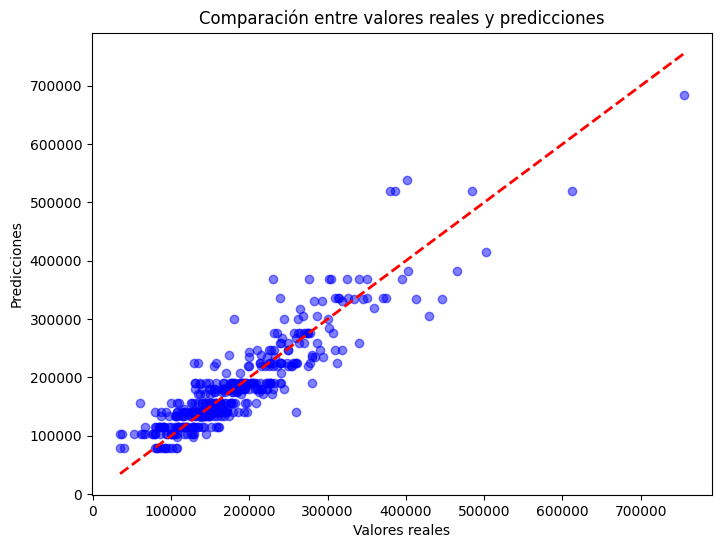

In [270]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, modelo1_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

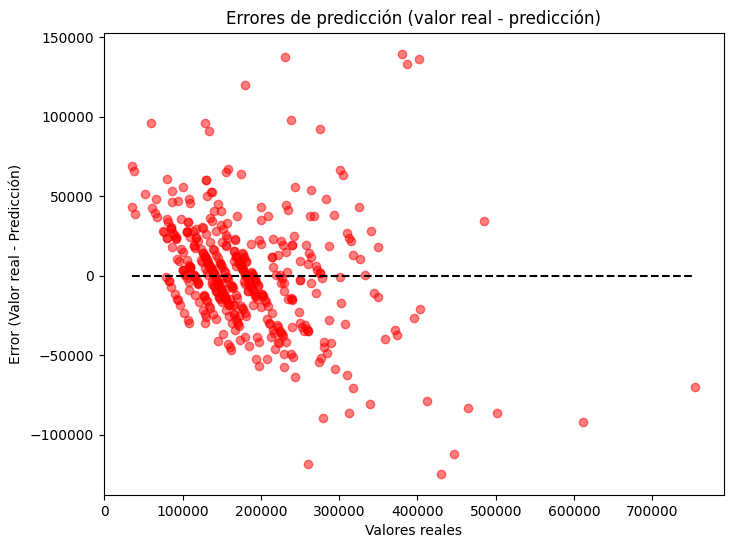

In [271]:
errores = modelo1_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

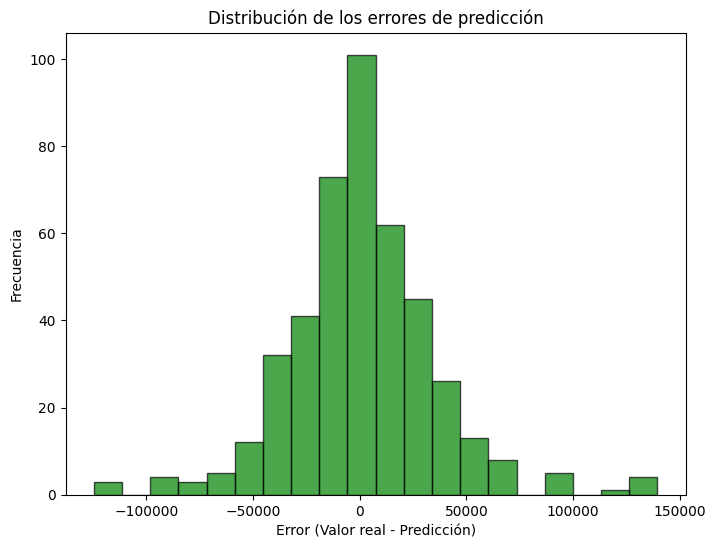

In [272]:
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

## Modelo 3

In [273]:
# Entrenar modelo
modelo = DecisionTreeRegressor(max_depth=7)
modelo.fit(X_train_scaled, y_train)

# Predicciones
modelo1_pred = modelo.predict(X_test_scaled)

#### Evaluación

In [274]:
r2 = r2_score(y_test, modelo1_pred)
print(f"R^2: {r2:.4f}")

mae = mean_absolute_error(y_test, modelo1_pred)
print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test, modelo1_pred)
print(f"MSE: {mse:.4f}")

R^2: 0.8371
MAE: 23038.7554
MSE: 1119462689.9182


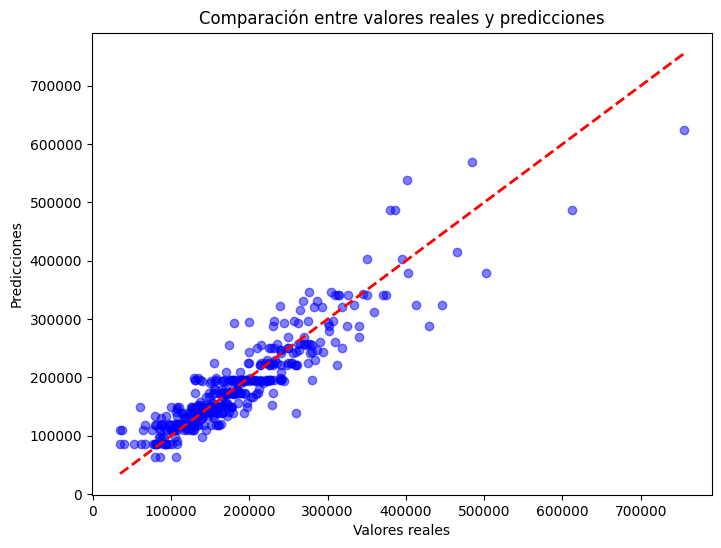

In [275]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, modelo1_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

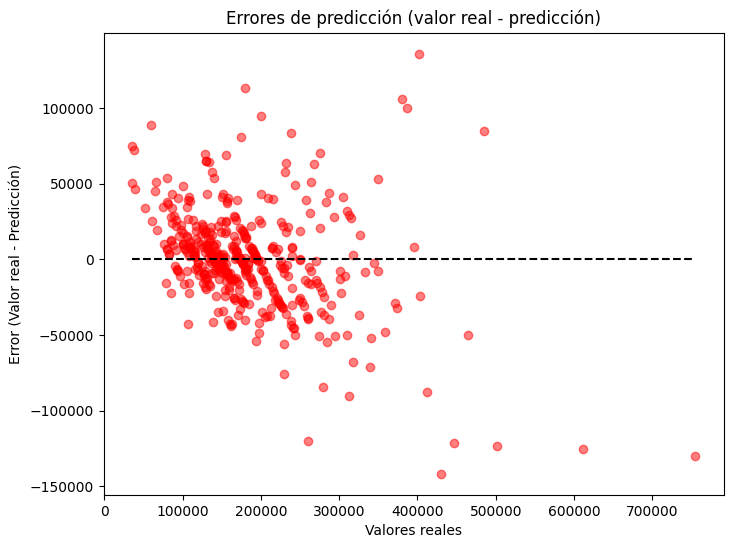

In [276]:
errores = modelo1_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

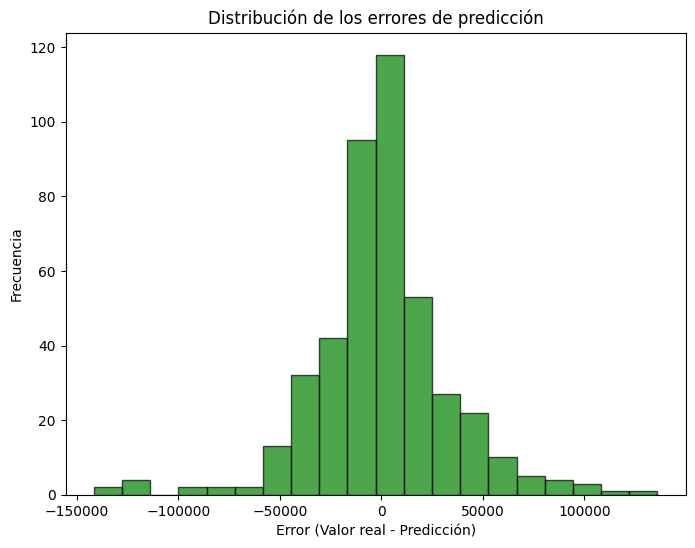

In [277]:
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

## Modelo 4

In [278]:
# Entrenar modelo
modelo = DecisionTreeRegressor(max_depth=8)
modelo.fit(X_train_scaled, y_train)

# Predicciones
modelo1_pred = modelo.predict(X_test_scaled)

#### Evaluación

In [279]:
r2 = r2_score(y_test, modelo1_pred)
print(f"R^2: {r2:.4f}")

mae = mean_absolute_error(y_test, modelo1_pred)
print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test, modelo1_pred)
print(f"MSE: {mse:.4f}")

R^2: 0.8249
MAE: 23486.0773
MSE: 1202919633.6614


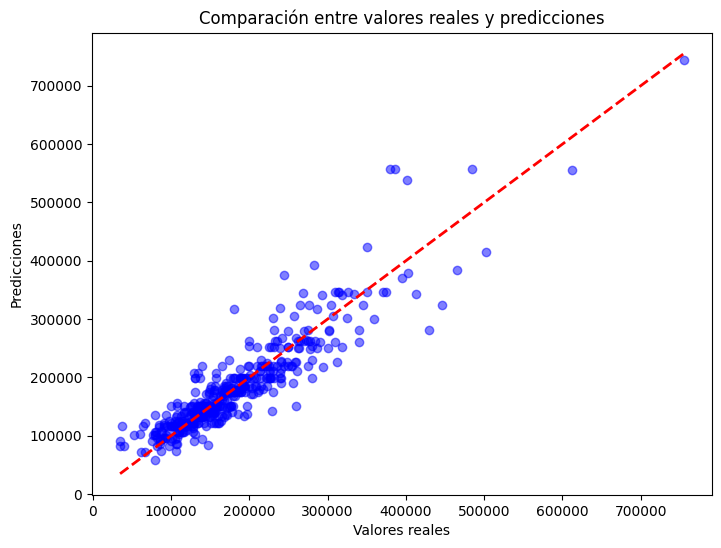

In [280]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, modelo1_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

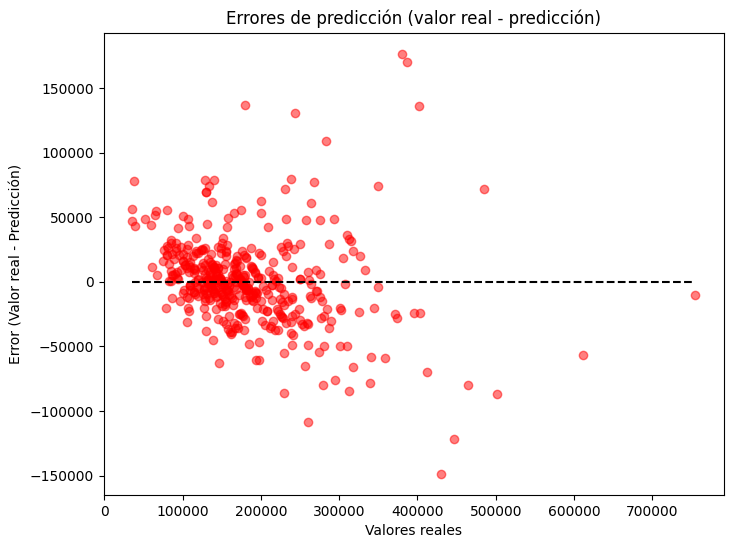

In [281]:
errores = modelo1_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

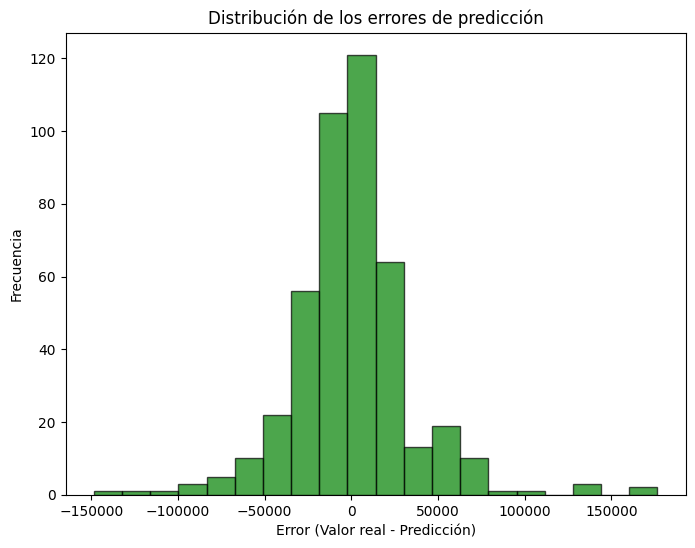

In [282]:
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

## Comprobación de resultados

In [283]:
# Definir el modelo base
tree = DecisionTreeRegressor()

# Definir el rango de max_depth a probar
param_grid = {"max_depth": range(1, 21)}

# Configurar GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor profundidad
print(f"Mejor profundidad: {grid_search.best_params_['max_depth']}")

Mejor profundidad: 9


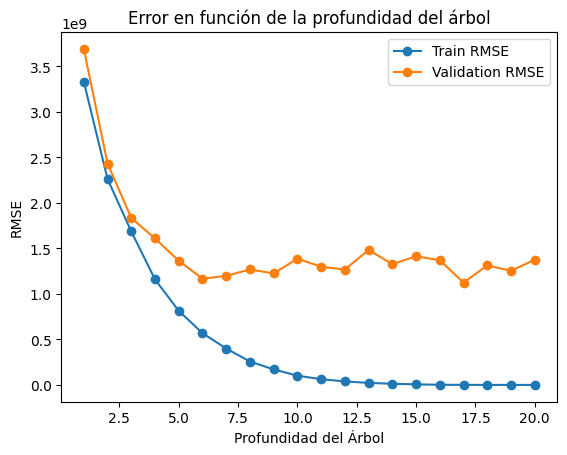

In [284]:
depths = range(1, 21)
train_errors, val_errors = [], []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    
    # Calcular error en entrenamiento y validación
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    val_errors.append(mean_squared_error(y_test, model.predict(X_test)))

# Graficar
plt.plot(depths, train_errors, label="Train RMSE", marker="o")
plt.plot(depths, val_errors, label="Validation RMSE", marker="o")
plt.xlabel("Profundidad del Árbol")
plt.ylabel("RMSE")
plt.legend()
plt.title("Error en función de la profundidad del árbol")
plt.show()